<a href="https://colab.research.google.com/github/jganzabal/othello-reinforcement-learning/blob/master/100_COLAB_othello_6x6_reinforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://github.com/jganzabal/othello-reinforcement-learning/raw/master/libraries.zip
! wget https://raw.githubusercontent.com/jganzabal/othello-reinforcement-learning/master/Game.py

--2019-11-02 21:26:32--  https://github.com/jganzabal/othello-reinforcement-learning/raw/master/libraries.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jganzabal/othello-reinforcement-learning/master/libraries.zip [following]
--2019-11-02 21:26:33--  https://raw.githubusercontent.com/jganzabal/othello-reinforcement-learning/master/libraries.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27984 (27K) [application/zip]
Saving to: ‘libraries.zip’

libraries.zip       100%[===================>]  27.33K  --.-KB/s    in 0.01s   

2019-11-02 21:26:34 (2.11 MB/s) - ‘libraries.zip’ saved [27984/2798

In [2]:
! unzip libraries.zip

Archive:  libraries.zip
   creating: othello/
  inflating: othello/OthelloGame.py  
   creating: othello/chainer/
  inflating: othello/chainer/NNet.py  
 extracting: othello/chainer/__init__.py  
  inflating: othello/chainer/OthelloNNet.py  
   creating: othello/tensorflow/
  inflating: othello/tensorflow/NNet.py  
 extracting: othello/tensorflow/__init__.py  
  inflating: othello/tensorflow/OthelloNNet.py  
   creating: othello/__pycache__/
  inflating: othello/__pycache__/__init__.cpython-36.pyc  
  inflating: othello/__pycache__/OthelloGame.cpython-36.pyc  
  inflating: othello/__pycache__/OthelloLogic.cpython-36.pyc  
  inflating: othello/OthelloLogic.py  
   creating: othello/.ipynb_checkpoints/
  inflating: othello/.ipynb_checkpoints/OthelloGame-checkpoint.py  
  inflating: othello/.ipynb_checkpoints/OthelloPlayers-checkpoint.py  
  inflating: othello/.ipynb_checkpoints/OthelloLogic-checkpoint.py  
  inflating: othello/OthelloPlayers.py  
   creating: othello/keras/
  inflating: 

In [3]:
! wget https://raw.githubusercontent.com/jganzabal/othello-reinforcement-learning/master/othello_viz.py

--2019-11-02 21:26:42--  https://raw.githubusercontent.com/jganzabal/othello-reinforcement-learning/master/othello_viz.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3945 (3.9K) [text/plain]
Saving to: ‘othello_viz.py’

othello_viz.py      100%[===================>]   3.85K  --.-KB/s    in 0s      

2019-11-02 21:26:42 (87.7 MB/s) - ‘othello_viz.py’ saved [3945/3945]



In [4]:
! wget https://raw.githubusercontent.com/jganzabal/othello-reinforcement-learning/master/othello_reinforce_helper.py

--2019-11-02 21:26:45--  https://raw.githubusercontent.com/jganzabal/othello-reinforcement-learning/master/othello_reinforce_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11069 (11K) [text/plain]
Saving to: ‘othello_reinforce_helper.py’

othello_reinforce_h 100%[===================>]  10.81K  --.-KB/s    in 0s      

2019-11-02 21:26:45 (160 MB/s) - ‘othello_reinforce_helper.py’ saved [11069/11069]



In [5]:
! wget https://raw.githubusercontent.com/jganzabal/othello-reinforcement-learning/master/playing_stats.py

--2019-11-02 21:26:48--  https://raw.githubusercontent.com/jganzabal/othello-reinforcement-learning/master/playing_stats.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2552 (2.5K) [text/plain]
Saving to: ‘playing_stats.py’

playing_stats.py    100%[===================>]   2.49K  --.-KB/s    in 0s      

2019-11-02 21:26:49 (45.2 MB/s) - ‘playing_stats.py’ saved [2552/2552]



In [0]:
from othello.OthelloGame import OthelloGame as Game
from othello.OthelloGame import display as displayGame

import numpy as np

In [0]:
# Defino juego
n = 6
game = Game(n)
board = game.getInitBoard()

In [8]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Concatenate, BatchNormalization, Activation, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam
import keras.backend as K
from keras.initializers import glorot_uniform
from keras.losses import categorical_crossentropy, binary_crossentropy

Using TensorFlow backend.


In [9]:
def one_cnn_6x6(lr = 0.001, ce_w=1, mse_w=1, input_shape = [6, 6, 1], do = 0.25):
    output_shape = input_shape[0]*input_shape[1]
    model = Sequential()
    model.add(Conv2D(16, 2, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 2, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, 2, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, 2, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, 2, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dropout(do))

    inp = Input(input_shape)
    x = model(inp)
    x_value = Dense(1, name='value')(x)
    x_policy = Dense(output_shape, activation='softmax', name='policy')(x)
    full_model = Model(inp, [x_value, x_policy])

    full_model.compile(Adam(lr), loss={'policy': 'categorical_crossentropy', 'value': 'mse'}, 
                       loss_weights={'policy': ce_w, 'value': mse_w})
    return full_model
model = one_cnn_6x6(lr = 0.001)
model.summary()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 6, 6, 1)      0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 256)          176128      input_1[0][0]                    
__________________________________________________________________________________________________
value (Dense)                   (None, 1)            257         sequential_1[1][0]               
__________________________________________________________________________________________________
policy (Dense)                  (None, 36)           9252      

In [0]:
def paper_cnn(lr=0.001, filters=512, filter_size=3, do=0.3, input_shape = [6, 6, 1], ce_w=1, mse_w=1):
    output_shape = input_shape[0]*input_shape[1]
    inp = Input(input_shape)    
    x = Activation('relu')(BatchNormalization(axis=3)(Conv2D(filters, filter_size, padding='same', use_bias=False)(inp)))         # batch_size  x board_x x board_y x num_channels
    x = Activation('relu')(BatchNormalization(axis=3)(Conv2D(filters, filter_size, padding='same', use_bias=False)(x)))         # batch_size  x board_x x board_y x num_channels
    x = Activation('relu')(BatchNormalization(axis=3)(Conv2D(filters, filter_size, padding='valid', use_bias=False)(x)))        # batch_size  x (board_x-2) x (board_y-2) x num_channels
    x = Activation('relu')(BatchNormalization(axis=3)(Conv2D(filters, filter_size, padding='valid', use_bias=False)(x)))        # batch_size  x (board_x-4) x (board_y-4) x num_channels
    x = Flatten()(x)       
    x = Dropout(do)(Activation('relu')(BatchNormalization(axis=1)(Dense(1024, use_bias=False)(x))))  # batch_size x 1024
    x = Dropout(do)(Activation('relu')(BatchNormalization(axis=1)(Dense(512, use_bias=False)(x))))          # batch_size x 1024
    v = Dense(1, activation='tanh', name='value')(x)                    # batch_size x 1
    pi = Dense(output_shape, activation='softmax', name='policy')(x)   # batch_size x self.action_size


    model = Model(inputs=inp, outputs=[v, pi])
    model.compile(loss=['mean_squared_error', 'categorical_crossentropy'], optimizer=Adam(lr), 
                  loss_weights=[ mse_w, ce_w])
    return model

In [0]:
from othello_viz import display_board, plot_episode

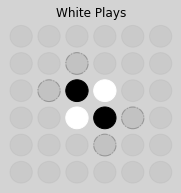

In [11]:
player = 1
display_board(game, board, player, valid_moves=game.getValidMoves(board, player))

In [0]:
from othello_reinforce_helper import play_with_full_model, play_episode_with_value, get_discounted_rewards

In [13]:
# Juego episodio
player = 1
# La razon por la que le paso board*player es para que la posición de comienzo sea la misma siempre
states, actions, rewards, values, predictions = play_episode_with_value(
    [lambda game, board, return_predictions: play_with_full_model(model, game, board, conv=True, return_predictions=return_predictions), 
     lambda game, board, return_predictions: play_with_full_model(model, game, board, conv=True, return_predictions=return_predictions)], 
    game, board*player, return_actions=True, return_predictions=True, append_last=True)
print('longitud episodio:', len(states))

longitud episodio: 33


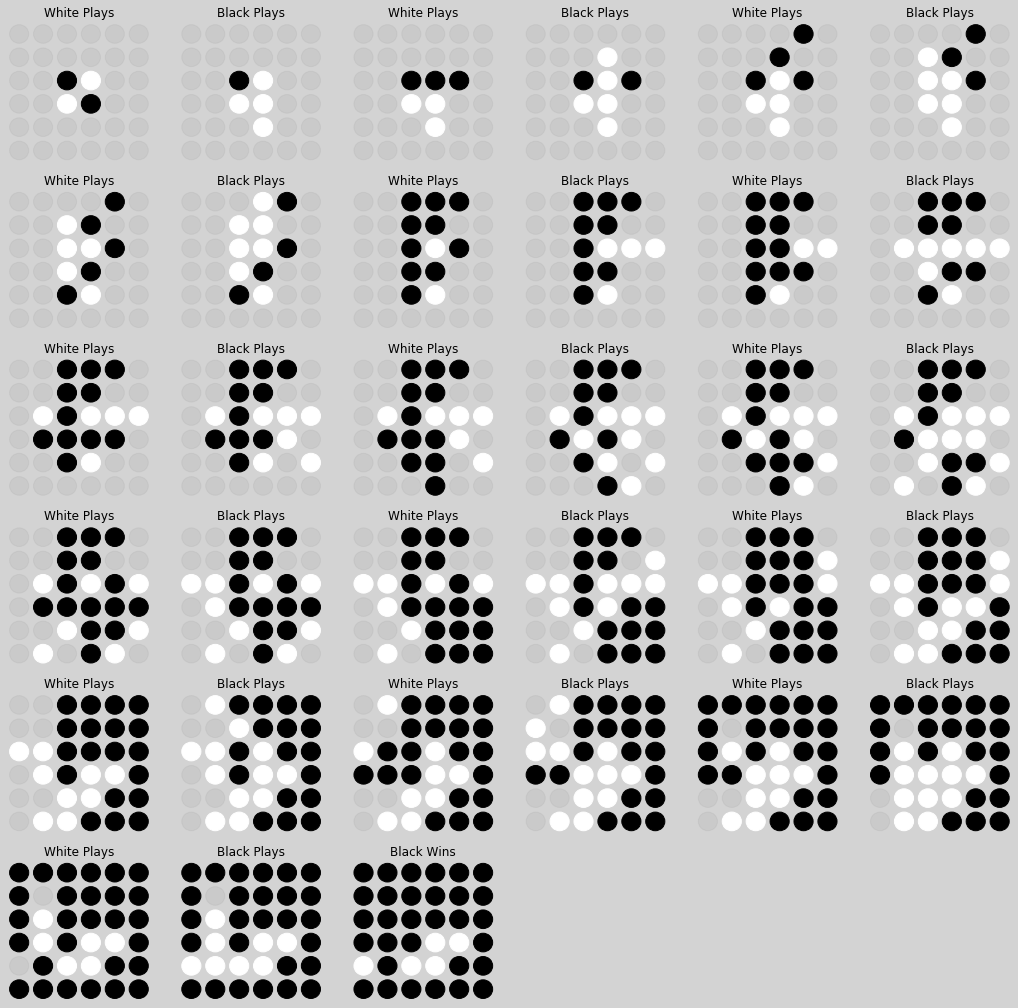

In [14]:
# Grafico episodio
plot_episode(game, states, initial_player = player)

### Interpretación del discounted reward en este caso (Juegos):
- Siempre empieza jugando blanco. Por eso si pierde blanco, el primer discounted reward (último empezando de atras) tiene que ser negativo
- Siempre se alterna (Si no hay movida eso se considera un paso mas). Esto es para asegurar que se puede multiplicar por -1 para el cálculo del discounted reward
- Si el flag de append_last esta en true, tenerlo en cuanta al analizar el último reward (El primero contando de atras)

In [15]:
# Para entender esto bien 
discounted_rewards = get_discounted_rewards(rewards)
print(discounted_rewards)

[-0.73230337  0.73970037 -0.74717209  0.75471929 -0.76234271  0.77004315
 -0.77782136  0.78567814 -0.79361428  0.80163059 -0.80972787  0.81790694
 -0.82616862  0.83451376 -0.84294319  0.85145777 -0.86005835  0.86874581
 -0.87752102  0.88638487 -0.89533825  0.90438208 -0.91351725  0.92274469
 -0.93206535  0.94148015 -0.95099005  0.96059601 -0.970299    0.9801
 -0.99        1.        ]


In [16]:
states_fl = np.array(states).reshape(-1, 36)
for i in range(len(rewards)):
    turn = ['w', 'b'][i%2]
    print(f'juega {turn} con tablero: {states_fl[i]} dada accion: {actions[i]} se evalua: {discounted_rewards[i]}, {rewards[i]}')

juega w con tablero: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  1 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0] dada accion: 27 se evalua: -0.7323033696543974, 0
juega b con tablero: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0 -1 -1  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0] dada accion: 16 se evalua: 0.7397003733882802, 0
juega w con tablero: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  1  1  0  0
  0  0  0  1  0  0  0  0  0  0  0  0] dada accion: 9 se evalua: -0.7471720943315961, 0
juega b con tablero: [ 0  0  0  0  0  0  0  0  0 -1  0  0  0  0  1 -1  1  0  0  0 -1 -1  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0] dada accion: 4 se evalua: 0.7547192872036325, 0
juega w con tablero: [ 0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  1 -1  0  0  0  1  1  0  0
  0  0  0  1  0  0  0  0  0  0  0  0] dada accion: 8 se evalua: -0.7623427143471035, 0
juega b con tablero: [ 0  0  0  0  1  0  0  0 -1  1  0  0  0  0 -1 -1  1  0  0  0 -1 -1  0  0
 

# Evaluate

In [0]:
from playing_stats import EvaluatePolicy
evalPolicy = EvaluatePolicy(None)

In [0]:
def evaluate_training_full(model, episodes = 100, conv=False, player=None, exploit=False):
    def play_with_mod(model, game, board, conv=conv, exploit=exploit):
        action, value = play_with_full_model(model, game, board, conv=conv, exploit=exploit)
        return action
    if player is None:
        player = evalPolicy.random_player
    player_1_wins, player_2_wins, ties, margins, steps_array, pieces = evalPolicy.get_stats(game, 
                                                    board, 
                                                    {1: player, 
                                                     -1: lambda game, board: play_with_mod(model, game, board, conv=conv, exploit=exploit)}, 
                                                    episodes)
    porc = 100.0*player_2_wins/episodes
    return porc

In [19]:
print(evaluate_training_full(model, conv=True, player=None))
print(evaluate_training_full(model, conv=True, player=evalPolicy.greedy_player))

51.0
27.0


# Train

In [0]:
from keras.utils import to_categorical

In [0]:
def play_episodes(model, game, board, episodes=1, conv=True, return_predictions=True, player=1):
    states_ = []
    actions_ = []
    rewards_ = []
    predictions_ = []
    discounted_rewards_preds_ = []
    for i in range(episodes):
        states, actions, rewards, discounted_rewards_preds, predictions = play_episode_with_value(
            [lambda game, board, return_predictions: play_with_full_model(model, game, board, conv=conv, return_predictions=return_predictions), 
             lambda game, board, return_predictions: play_with_full_model(model, game, board, conv=conv, return_predictions=return_predictions)], 
            game, board*player, return_actions=True, return_predictions=True)
        states_.append(states)
        actions_.append(actions.reshape(-1, 1))
        rewards_.append(rewards.reshape(-1, 1))
        discounted_rewards_preds_.append(discounted_rewards_preds.reshape(-1, 1))
        predictions_.append(predictions)
    return np.vstack(states_), np.vstack(actions_), np.vstack(rewards_), np.vstack(discounted_rewards_preds_), np.vstack(predictions_)

In [0]:
n_square = game.n**2
dropout = 0.0
batch_size = 32
# model = one_cnn_6x6(lr=0.001, do=dropout)
model = paper_cnn(lr=0.001, do=dropout)
epsilon = 1e-12
losses = []
value_losses = []
policy_losses = []
episodes = 20_000
eval_period = 100
conv = True
discounted_rewards_preds=None
for episode in range(episodes):       
    states, actions, rewards, discounted_rewards_preds, predictions = play_episodes(model, game, board, episodes=2)
    
    discounted_rewards = get_discounted_rewards(rewards)
    no_move_indexes = (actions != n_square).flatten()
    states = states[no_move_indexes]
    actions = actions[no_move_indexes].reshape(-1, 1)
    discounted_rewards = discounted_rewards[no_move_indexes].reshape(-1, 1)
    discounted_rewards_preds = discounted_rewards_preds[no_move_indexes].reshape(-1, 1)
    
    # Augmentation
    states = np.vstack([states, np.flip(states, axis=[2]), np.flip(states, axis=[1]), np.rot90(states, axes=(1, 2))])
    actions = np.vstack([actions, actions, actions, actions])
    discounted_rewards = np.vstack([discounted_rewards, discounted_rewards, discounted_rewards, discounted_rewards])
    discounted_rewards_preds = np.vstack([discounted_rewards_preds, discounted_rewards_preds, discounted_rewards_preds, discounted_rewards_preds])
    

    x_train = states.reshape(-1, *board.shape, 1)
    
    y_train = to_categorical(actions, n_square)*(discounted_rewards - discounted_rewards_preds)

    hist = model.fit(x_train, [discounted_rewards, y_train], epochs=1, verbose=0, batch_size=batch_size)
    value_losses.append(hist.history['value_loss'][-1])    
    policy_losses.append(hist.history['policy_loss'][-1])
    losses.append(hist.history['loss'][-1])
    
    if episode%eval_period == 0:
        entropy = np.mean(-np.sum(np.log(predictions+epsilon)*predictions, axis=1)/np.log(n_square))
        print(f'episode: {episode}, entropy={entropy}, loss={np.mean(losses[-eval_period:])}, policy_loss={np.mean(policy_losses[-eval_period:])}, value_loss={np.mean(value_losses[-eval_period:])}')
        rand_sec = evaluate_training_full(model, episodes=100, conv=conv, player=evalPolicy.random_player)
        pol_sec = evaluate_training_full(model, episodes=100, conv=conv, player=evalPolicy.greedy_player)
        rand_sec_ex = evaluate_training_full(model, episodes=100, conv=conv, player=evalPolicy.random_player, exploit=True)
        pol_sec_ex = evaluate_training_full(model, episodes=100, conv=conv, player=evalPolicy.greedy_player, exploit=True)
        print(f'Como segundo contra random_player (explore|exploit): {rand_sec} | {rand_sec_ex}')
        print(f'Como segundo contra greedy player (explore|exploit): {pol_sec} | {pol_sec_ex}')
        print()
        if (rand_sec_ex == 100) and (pol_sec_ex == 100):
            print('Evaluando con 2000 episodios ...')
            rand_sec_ex = evaluate_training_full(model, episodes=2000, conv=conv, player=evalPolicy.random_player, exploit=True)
            print(rand_sec_ex)
            if rand_sec_ex == 100:
                break

episode: 0, entropy=0.9999839663505554, loss=0.3862510389751858, policy_loss=-0.5311089791948833, value_loss=0.9173600162778582
Como segundo contra random_player (explore|exploit): 53.0 | 67.0
Como segundo contra greedy player (explore|exploit): 43.0 | 57.0

